In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.re_referencing import rref_REST

DEBUG:root:test
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
# Params load data
data_folder = "../data/"

metric = "TE"

# Params Reconstruction
reconst_threshold = None #0.2

# Params Cleaning
clean_threshold = 0.6
window_time_cleaning = 10
rref_fn = rref_REST

# Params TE
max_lag = 20
min_lag = 1
cmi_estimator = 'JidtGaussianCMI' #'JidtKraskovCMI' 'OpenCLKraskovCMI' 'JidtGaussianCMI'
local_values = False

if metric.upper() == "AIS":
    folder_name = f"reconstth-{reconst_threshold}_cleanth-{clean_threshold}_windowtimecleaning-{window_time_cleaning}_{rref_fn.__name__}_maxlag-{max_lag}_cmiestimator-{cmi_estimator}".replace(".", "o")
else:
    folder_name = f"{metric}_reconstth-{reconst_threshold}_cleanth-{clean_threshold}_windowtimecleaning-{window_time_cleaning}_{rref_fn.__name__}_maxlag-{max_lag}_minlag-{min_lag}_cmiestimator-{cmi_estimator}".replace(".", "o")
    
save_folder = os.path.join(
    "../results/", 
    folder_name
)


In [3]:
hc_filenames = list(filter(lambda x: x.startswith("h"), sorted(os.listdir(data_folder))))
sz_filenames = list(filter(lambda x: x.startswith("s"), sorted(os.listdir(data_folder))))

filenames = hc_filenames + sz_filenames[:-3]
filenames

['h01.edf',
 'h02.edf',
 'h03.edf',
 'h04.edf',
 'h05.edf',
 'h06.edf',
 'h07.edf',
 'h08.edf',
 'h09.edf',
 'h10.edf',
 'h11.edf',
 'h12.edf',
 'h13.edf',
 'h14.edf',
 's01.edf',
 's02.edf',
 's03.edf',
 's04.edf',
 's05.edf',
 's06.edf',
 's07.edf',
 's08.edf',
 's09.edf',
 's10.edf',
 's11.edf']

In [4]:
import metrics.analyser
from idtxl.multivariate_te import MultivariateTE
network_analysis = MultivariateTE()
from utils.data_filtering import preprocess_data
from metrics import analyse_network_by_metric

In [5]:
settings = {
    'cmi_estimator': cmi_estimator, 
    'local_values': local_values, 
    'max_lag_sources': max_lag,
    'min_lag_sources': min_lag,
     #'n_perm_max_stat': 11,
     #'n_perm_min_stat': 11,
     #'alpha_max_stat': 0.1,
     #'n_perm_omnibus': 11,
     #'alpha_omnibus': 0.1,
     #'n_perm_max_seq': 11,
     #'alpha_max_seq': 0.1, 
     #'alpha_min_stat': 0.1,
     'verbose': False
}

In [6]:
channels = np.arange(19)

for filename in filenames:
    print("Preprocessing:", filename)
    filepath = os.path.join(data_folder, filename)
    data_windows = preprocess_data(filepath, 
                                   reconst_threshold=reconst_threshold,
                                   clean_threshold=clean_threshold,
                                   window_time=window_time_cleaning,
                                   rref_fn=rref_fn
                                  )
    
    save_subject_folder = filename.split(".edf")[0]
    if not os.path.exists(os.path.join(save_folder, save_subject_folder)):
        os.makedirs(os.path.join(save_folder, save_subject_folder))
    
    for i_target in [16, 17, 18]:
        te_arr = []
        for i_window, data_window in enumerate(data_windows):
            print(f"Working on: {filename} for target: {i_target} with window: {i_window}")
            # Calculating TE
            net_analysis = analyse_network_by_metric(data_window, 
                                                     channels=channels, 
                                                     metric=metric, 
                                                     target=i_target,
                                                     **settings)
            break
        break
    break

Preprocessing: h01.edf
Extracting EDF parameters from /Users/Wis/dynamicinfo-eeg/data/h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 8251 samples (33.004 sec)



INFO:root:Please use a band in filter_bands=dict_keys(['alpha', 'beta', 'gamma', 'theta'])
INFO:root:window number 32 rejected
INFO:root:window number 33 rejected
INFO:root:window number 36 rejected
INFO:root:window number 58 rejected
INFO:root:window number 60 rejected
INFO:root:window number 61 rejected
INFO:root:window number 65 rejected
INFO:root:window number 67 rejected
INFO:root:window number 70 rejected
INFO:root:window number 71 rejected
INFO:root:window number 72 rejected
INFO:root:window number 80 rejected
INFO:root:window number 81 rejected
INFO:root:window number 82 rejected
INFO:root:window number 83 rejected
INFO:root:window number 84 rejected
INFO:root:window number 86 rejected
INFO:root:window number 87 rejected


Working on: h01.edf for target: 16 with window: 0
Adding data with properties: 19 processes, 2500 samples, 1 replications
overwriting existing data

---------------------------- (1) include target candidates



KeyboardInterrupt: 

In [7]:
res_ch = {}
for filename in filenames:
    save_subject_folder = filename.split(".edf")[0]
    for i_channel in [16, 17, 18]:
        if metric.upper() == "AIS":
            print(f"Loading: {filename}, channel: {i_channel}")
            save_filename = f"ais_ichannel-{i_channel}"
            load_filepath = os.path.join(save_folder, save_subject_folder, save_filename)
        else:
            print(f"Loading: {filename}, target: {i_channel}")
            save_filename = f"te_itarget-{i_channel}"
            load_filepath = os.path.join(save_folder, save_subject_folder, save_filename)
        npz = np.load(f"{load_filepath}.npz", allow_pickle=True)
        if metric.upper() == "AIS":
            res = npz["ais"]
        else:
            res = npz["te"]
        res_ch.setdefault(save_subject_folder, {})
        res_ch[save_subject_folder].setdefault(f"{i_channel}", res)


Loading: h01.edf, target: 16
Loading: h01.edf, target: 17
Loading: h01.edf, target: 18
Loading: h02.edf, target: 16
Loading: h02.edf, target: 17
Loading: h02.edf, target: 18
Loading: h03.edf, target: 16
Loading: h03.edf, target: 17
Loading: h03.edf, target: 18
Loading: h04.edf, target: 16
Loading: h04.edf, target: 17
Loading: h04.edf, target: 18
Loading: h05.edf, target: 16
Loading: h05.edf, target: 17
Loading: h05.edf, target: 18
Loading: h06.edf, target: 16
Loading: h06.edf, target: 17
Loading: h06.edf, target: 18
Loading: h07.edf, target: 16
Loading: h07.edf, target: 17
Loading: h07.edf, target: 18
Loading: h08.edf, target: 16
Loading: h08.edf, target: 17
Loading: h08.edf, target: 18
Loading: h09.edf, target: 16
Loading: h09.edf, target: 17
Loading: h09.edf, target: 18
Loading: h10.edf, target: 16
Loading: h10.edf, target: 17
Loading: h10.edf, target: 18
Loading: h11.edf, target: 16
Loading: h11.edf, target: 17
Loading: h11.edf, target: 18
Loading: h12.edf, target: 16
Loading: h12.e

FileNotFoundError: [Errno 2] No such file or directory: '../results/TE_reconstth-None_cleanth-0o6_windowtimecleaning-10_rref_REST_maxlag-20_minlag-1_cmiestimator-JidtGaussianCMI/s08/te_itarget-17.npz'

In [41]:
def matrix_weights_stats(all_matrix, weights = 'binary', plot_mean = False, plot_std = False):
    ''' 
    return: mean and std weight matrix
    all_matrix should be like: rec_ch['subject']['channel']
    weights (str) could be 'binary', 'max_te_lag', 'max_p_lag', 'vars_count' '''
    matrix = np.array([net.get_adjacency_matrix(weights, fdr=False)._weight_matrix for net in all_matrix])
    edges = np.array([net.get_adjacency_matrix(weights, fdr=False).get_edge_list() for net in all_matrix])
    matrix_mean = matrix.mean(axis = 0)
    matrix_std = matrix.std(axis = 0)  
    if plot_mean == True:
        plt.matshow(matrix_mean)
        plt.title(f'Mean weights ({weights})')
    if plot_std == True:
        plt.matshow(matrix_std)
        plt.title(f'Std weights ({weights})')  
    return matrix_mean, matrix_std, edges

def final_matrix(sub, channel, weights = 'binary', plot_mean = False, plot_std = False):
    '''
    Given a channel number return (meana and std) weight matrix for all HC or HZ subjects'''
    if sub == 'hc':
        sub_filename = hc_filenames
    else:
        sub_filename = sz_filenames
    all_matrix = np.array([matrix_weights_stats(res_ch[sub[0:3]][f'{channel}'], weights = weights)[0] for sub in sub_filename])
    all_matrix_mean = all_matrix.mean(axis = 0)
    all_matrix_std = all_matrix.std(axis = 0)
    if plot_mean == True:
        plt.matshow(all_matrix_mean)
        plt.title(f'All {sub} mean weights ({weights}). Channel: {channel}')
    if plot_std == True:  
        plt.matshow(all_matrix_std)
        plt.title(f'All {sub} std weights ({weights}). Channel: {channel}')
    return all_matrix_mean, all_matrix_std

/anaconda3/envs/sz_eeg_py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


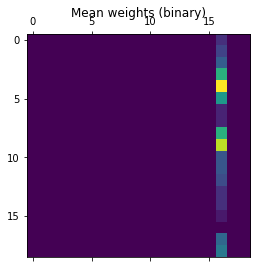

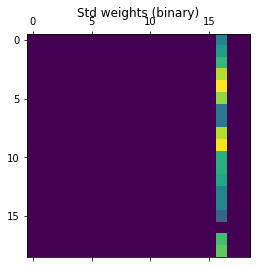

In [43]:
# try just one subject
w = 'binary'
mm, ms, e= matrix_weights_stats(res_ch['h01']['16'], w, True, True)
#print(mm.shape)

/anaconda3/envs/sz_eeg_py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


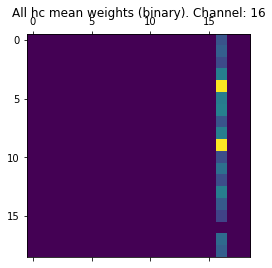

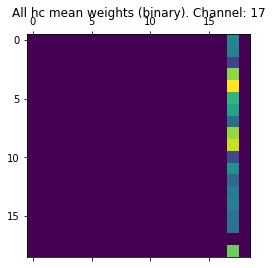

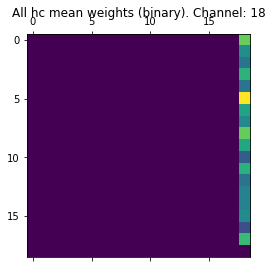

In [45]:
# HC all channels
channels = [16, 17, 18]
sub = 'hc'
for ch  in channels:
    _ = final_matrix(sub = sub, channel = ch, plot_mean = True, plot_std = False)

In [46]:
# HZ all channels
channels = [16, 17, 18]
sub = 'hz'
for ch  in channels:
    _ = final_matrix(sub = sub, channel = ch, plot_mean = True, plot_std = False)

/anaconda3/envs/sz_eeg_py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


KeyError: 's09'

In [ ]:
#npy = np.load("te.npy", allow_pickle=True)
#npy[0].get_adjacency_matrix("max_te_lag", fdr=False).get_edge_list()

#net_analysis.get_adjacency_matrix("max_te_lag", fdr=False).get_edge_list()
#for n in npy:
#    plt.figure()
#    plt.matshow(n.get_adjacency_matrix("max_te_lag", fdr=False)._weight_matrix)
#net_analysis.get_adjacency_matrix("max_p_lag", fdr=False)._weight_matrix

#npz = np.load(f"{load_filepath}.npz", allow_pickle=True)
#npz["te"]

In [ ]:
#npy[0].get_adjacency_matrix("max_te_lag", fdr=False).get_edge_list()

In [ ]:
#matrices = np.array([net.get_adjacency_matrix("max_te_lag", fdr=False)._weight_matrix for net in npy])
#plt.matshow(matrices.mean(axis=0))
#plt.matshow(matrices.std(axis=0))
#matrices.std(axis=0)

In [ ]:
#results.print_edge_list(weights='max_te_lag', fdr=False)
#plot_network(results=results, weights='max_te_lag', fdr=False)

In [ ]:
#npy[0]._single_target[16]["te"]